**Reading**
===============================

**Studio della funzione plot_peak_classification**
--------------
che si trova in [straxen/analyses/quick_checks.py](https://github.com/XENONnT/straxen/blob/master/straxen/analyses/quick_checks.py#L238):

* prende come input **peaks** e la dimensione dei punti nel plot (s=1)
* fa uno scatter plot di **area(PE)** vs **rise_time(ns)**

**Studio di apply_selection, make, get_df e get_array**
------------------------------------
from [strax/context.py](https://github.com/AxFoundation/strax/blob/master/strax/context.py)

1. **[apply_selection](https://github.com/AxFoundation/strax/blob/master/strax/context.py#L840)**:
* prende in input un argomento **x** che ritorna anche in output dopo aver applicato i tagli
* i tagli devono essere scritti in una stringa, bisogna inserire ache il time_range

2. **[make](https://github.com/AxFoundation/strax/blob/master/strax/context.py#L901)**:
* prende in input **run_id**, anche più di uno, e un **target** e non ha niente in output

3. [get_array](https://github.com/AxFoundation/strax/blob/master/strax/context.py#L925)

* prende in input **run_id**, anche più di uno, e un **target** e in output ritorna un numpy array con il contenuto del target

4. [get_df](https://github.com/AxFoundation/strax/blob/master/strax/context.py#L1046)

* prende in input **run_id**, anche più di uno, e un **target** e in output ritorna un pandas DataFrame con il contenuto del target

**Studio di mini_analysis**
---------------------------
si trova in [straxen/mini_analysis.py](https://github.com/XENONnT/straxen/blob/master/straxen/mini_analysis.py) ed un esempio di un'analisi in straxen

Prende come argomento solo **run_id**, poi altri argomenti tramite le parole chiave soltanto.
Viene usata la stessa selezione di get_array.

Si può guardare qui per la documentazione sulla [mini-analysis](https://straxen.readthedocs.io/en/latest/tutorials/mini_analyses.html).

mini-analysis è una funzione che può fare plot o calcolare alcuni valori. Per dichiarazione una funzione come mini-analysis, bisogna "decorate" con @straxen.mini_analysis. ad esempio:

    @straxen.mini_analysis(requires=[

        ‘records’, [‘peaks’, (‘peaks’, ‘peak_basics’, ‘peak_classification’)]

    ]) def waveform_display(to_pe, t0, t1, records, peaks):

Questa funzione prende argomenti di 2 tipi: records and peaks. **peaks** deve contenere informazioni da peaks, peak_basics e peak_classification.
Olte il tipo di dati (records e peaks nell'esempio), una funzione mini-analysis può prendere argomenti speciali che sono:

* context
* run_id
* to_pe: PMT gain applicato al run_id caricato
* t_reference: start time de lrun
* selection_str: string di selezione
* time_range: (start, stop) in ns
* time_selection: tipo di selezione usata (fully_contained, touching, or skip)

L'analisi prende sempre questi argomenti, anche se non vengono passati. Altri argomenti devono essere passati come **keyword arguments**, ad esempio plot_pmt_pattern takes prendo un argomento extra : ` @straxen.mini_analysis(requires=('records',)) def plot_pmt_pattern(*, records, to_pe, array='bottom'):`


# Tutorial

* fin'ora abbiamo parlato dei plugin, questa settimana si parla dei **context** e la prossima dei **metadata**
* si parla di mini_analysis e di cosa si può fare

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import strax
import straxen

st = straxen.contexts.xenon1t_dali()

In [23]:
runs = st.select_runs(available='event_info', run_mode='background*')
runs.head()

Checking data availability: 100%|██████████| 5/5 [00:51<00:00, 10.28s/it]


,name,number,start,reader.ini.name,trigger.events_built,end,tags,mode,livetime,tags.name,records_available,events_available,raw_records_available,peaklets_available,event_info_available
0,170204_1410,6786,2017-02-04 14:10:08+00:00,background_stable,19574,2017-02-04 15:10:13+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:05,NaN,True,True,True,True,True
1,170204_1510,6787,2017-02-04 15:10:28+00:00,background_stable,19634,2017-02-04 16:10:32+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True
2,170204_1610,6788,2017-02-04 16:10:39+00:00,background_stable,19400,2017-02-04 17:10:43+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True
3,170204_1710,6789,2017-02-04 17:10:51+00:00,background_stable,19415,2017-02-04 18:10:54+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:03,NaN,True,True,True,True,True
4,170204_1810,6790,2017-02-04 18:11:01+00:00,background_stable,19671,2017-02-04 19:11:05+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True


In [24]:
background_run = '170204_1410'
argon_run = '181025_0030'

## Energy Spectrum

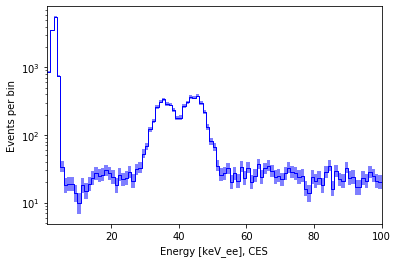

In [39]:
st.plot_energy_spectrum(argon_run,geomspace=False)

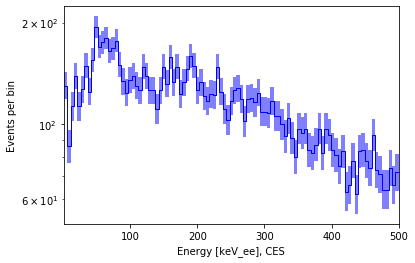

In [38]:
st.plot_energy_spectrum(background_run,min_energy=1,max_energy=500,geomspace=False)

Si possono personalizzare i plot e le varie funzioni e si possono fare più plot insieme, mettendo ? si possono guardare le opzioni delle varie funzioni. L'idea è quella di fare dei plot veloci o guardare delle cose velocemente

## Waveforms

There is also st.waveform_display: it might work sometimes. Currently it doesn't, at least not in my environment.

In [14]:
st.make(background_run, 'event_info', config=dict(trigger_min_area=12123))

df = st.get_array(background_run, 'event_info')
event = df[np.argmax(df['s2_area'])]
t = event['time']
window = (t, t + int(3e6) * 1)

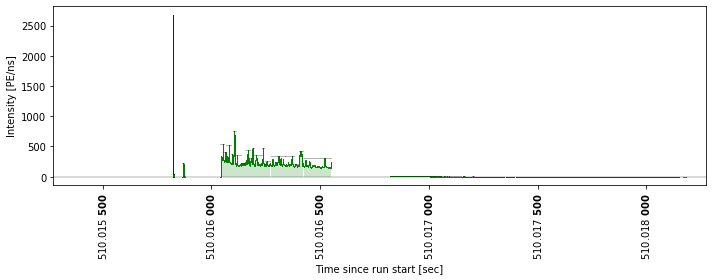

In [15]:
st.plot_waveform(background_run, time_range=window)

c'è un picco molto alto che è legato ad un muone, poi c'è un gap

## Definizione di nuovi mini-analysis

In [16]:
def plot_vetos(vetos, t0):
    def normalize_time(t):
        return (t - t0) / int(1e9)

    for veto in vetos:
        plt.axvspan(
            normalize_time(veto['time']),
            normalize_time(strax.endtime(veto)),
            color='r', alpha=0.2, linewidth=0)
        
t0 = st.estimate_run_start(background_run)
vetos = st.get_array(background_run, 'veto_regions', time_range=window)

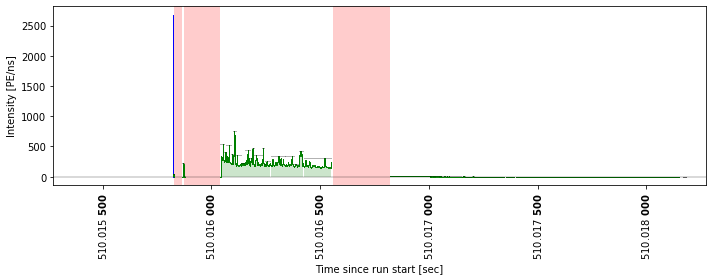

In [17]:
st.plot_waveform(background_run, time_range=window)

plot_vetos(vetos, t0)

In [18]:
@straxen.mini_analysis(requires=('veto_regions',))
def cool_waveform_display(context, run_id, 
                          veto_regions,
                          t_reference,
                          **kwargs):
    context.plot_waveform(run_id, **kwargs)
    plot_vetos(vetos, t_reference)

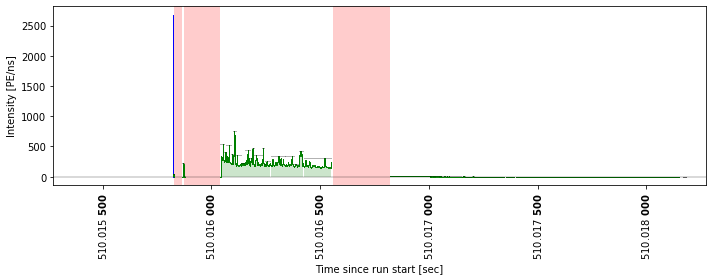

In [19]:
st.cool_waveform_display(background_run, time_range=window)

## Low Level

In [20]:
t = event['s1_time']
window = (t - int(2e3), t + int(2e3))

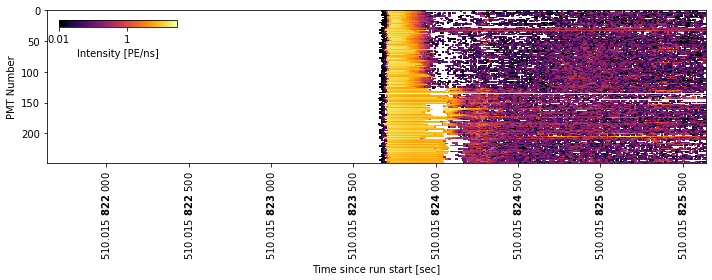

In [21]:
st.plot_records_matrix(background_run, time_range=window, cbar_loc='upper left')